In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

#import tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

#import other helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm

print(tf.__version__) #tf version
tf.enable_eager_execution()

1.13.1


In [3]:
#import Fashion MNIST dataset
dataset, metadata= tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset=dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /home/emuca002/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [4]:
#store images as class names
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
#Data Exploration

#get number of images in train and test dataset
num_train_examples= metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples

#print statements
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [6]:
#Data preprocessing

#normalize the pixels of each image to a range [0,1]
def normalize(images, labels):
    images=tf.cast(images, tf.float32)
    images /=255
    return images, labels

    #normalize train and test datasets
    train_dataset= train_dataset.map(normalize)
    test_dataset=test_dataset.map(normalize)

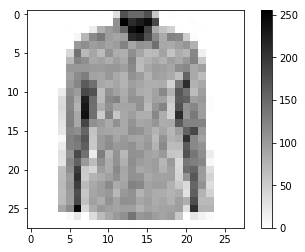

In [7]:
#take a single image and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image=image.numpy().reshape((28,28))

#plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

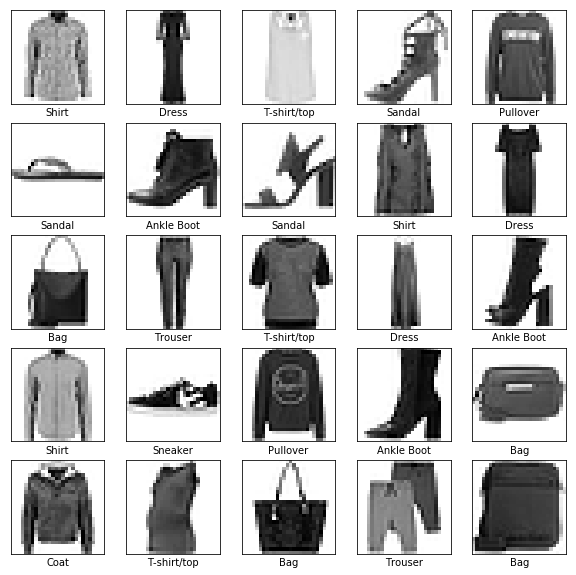

In [8]:
#display the first 25 images from the test set
plt.figure(figsize=(10,10))
i=0
for (image, label) in test_dataset.take(25):
    image=image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1
plt.show()

In [9]:
#Building the Model
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #this layer transforms images from a 2d array(28 by 28) to 1d array of 784 pixels
    tf.keras.layers.Dense(128, activation=tf.nn.relu), #densely connected layer of 128 neurons. Each neuron takes input from all the 784 nodes in the previous layer,
                                                       #weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #a 10-node softmax layer, with each node representing a class of clothing. Each node takes input from the 128 in the 
                                                        #layer before it. Each node weights the input according to the learned parameter and then outputs a value in the range [0,1], representing
                                                        #the probability that the image belongs to that class. The sum of all 10 node values is 1.
])

In [11]:
#compiling the model
#setting up loss function, optimizer, metrics
#loss= algorithm to measure how far the model's outputs are from the desired output.
#optimizer= algorithm for adjusting the inner parameters of the model to minimize loss
#metrics= used to monitor the training and testing steps. 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
#training the model
#BATCH_SIZE= tells model.fit to use batches of 32 images and labels when updating the model variables
#Shuffle= randomizes the order so that the model doesn't learn anything from the order of the examples
#Repeat= parameter describing how long training is performed

BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5


ValueError: Error when checking input: expected flatten_input to have 4 dimensions, but got array with shape (32, 32, 28, 28, 1)

In [14]:
#Evaluate accuracy
test_loss, test_accuracy= model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset: ', test_accuracy)

313/313 [==============================] - 4s 14ms/step - loss: 14.2798 - acc: 0.1101
Accuracy on test dataset:  0.1101


In [15]:
#Make predictions and explore
for test_images, test_labels in test_dataset.take(1):
    test_images=test_images.numpy()
    test_labels=test_labels.numpy()
    predictions=model.predict(test_images)
    
predictions.shape

(32, 10)

In [17]:
#first prediction. A prediction is an array of 10 numbers. These describe the 'confidence' of the model that the image corresponds
#to each of the 10 different articles of clothing. The highest value is the one with the highest confidence
predictions[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [18]:
#get the max value from the array for the specific prediction
np.argmax(predictions[0])

6